In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
import os
#os.getcwd()
df = pd.read_csv('C:\\Users\\Aliiu\\Documents\\GitHub\\stage-f-09-campaign-finance\\data\\new_project_data1.csv')
df.head(3)

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,601274.50,907156.21,1074949.50,978518.98,1074949.50,908518.98,1094022.76,Y
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,Y
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,542105.38,656210.29,650855.38,675642.76,650855.38,656642.76,711287.85,Y


In [18]:
print(df.winner.value_counts())
#l,w=df.winner.value_counts()
print('Winners', w)
print('Loosers',l)


N    1087
Y     464
Name: winner, dtype: int64
Winners 464
Loosers 1087


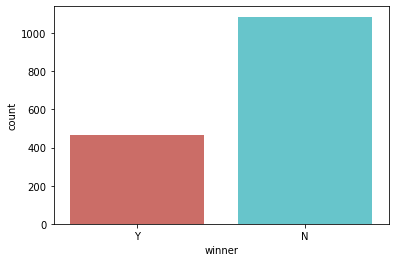

In [19]:
sns.countplot(x='winner', data=df, palette='hls')
plt.savefig('imb.jpg')
plt.show()

In [20]:
df['winner'] = df['winner'].apply(lambda val: float(int(val=='Y')))
df.winner.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: winner, dtype: float64

In [21]:
x_unbal = df[['ind_con','net_ope_exp','tot_con','tot_dis','net_con','ope_exp','tot_rec']]
y_unbal =df.winner

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  

x_train, x_test, y_train, y_test = train_test_split(x_unbal, y_unbal, test_size=0.3, random_state=4)
ss = StandardScaler() 
x_train = ss.fit_transform(x_train) 
x_train = pd.DataFrame(x_train)
x_test = ss.transform(x_test)

lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))

cross_val_scores = cross_val_score(lreg, x_train,y_train, cv=10,scoring='accuracy').mean()
# print('cross validation score',cross_val_scores)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)